## Import thư viện PyTorch

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Đặt các siêu tham số (Hyper-parameters)

In [2]:
# Kịch thước đầu vào
input_size = 1

# Kịch thước đầu ra
output_size = 1

# Số lượng epochs
num_epochs = 60

# Tốc độ học - Learning rate
learning_rate = 0.001

## Bộ dữ liệu (Datasets)

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Mô hình hồi quy tuyến tính (Linear regression model)

In [4]:
model = nn.Linear(input_size, output_size)

## Hàm mất mát (loss function) và bộ tối ưu hóa (optimizer)

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

## Huấn luyện mô hình

In [6]:
for epoch in range(num_epochs):
    # Chuyển đổi Numpy array thành PyTorch tensor
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Lan truyền tiến (Forward pass) và tính toán mất mát
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Lan truyền ngược (Backward pass) và tối ưu
    
    ## Đăt zero_grad để không tính toán đạo hàm
    optimizer.zero_grad()
    
    ## Gọi backward()
    loss.backward()
    
    ## Tối ưu
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 25.1148
Epoch [10/60], Loss: 10.3715
Epoch [15/60], Loss: 4.3985
Epoch [20/60], Loss: 1.9785
Epoch [25/60], Loss: 0.9978
Epoch [30/60], Loss: 0.6003
Epoch [35/60], Loss: 0.4390
Epoch [40/60], Loss: 0.3734
Epoch [45/60], Loss: 0.3466
Epoch [50/60], Loss: 0.3355
Epoch [55/60], Loss: 0.3308
Epoch [60/60], Loss: 0.3286


## Trực quan hóa bằng đồ thị

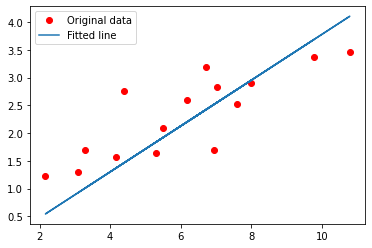

In [7]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

## Lưu mô hình (model checkpoint)

In [8]:
torch.save(model.state_dict(), 'model.ckpt')